In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def sample_image(image, factor):
  """
  Downsamples the image by the given factor.
  Args:
  image (numpy array): Original image.
  factor (int): Factor by which to downsample.
  Returns:
  numpy array: Downsampled image.
  """
  height, width = image.shape[:2]
  sampled_image = cv2.resize(image, (width // factor, height //
  factor), interpolation=cv2.INTER_NEAREST)
  return sampled_image

In [25]:
def quantize_image(image, levels):
  """Reduces the number of grayscale levels in the image.
Args:
image (numpy array): Original image.
levels (int): Number of grayscale levels.
Returns:
numpy array: Quantized image.
"""
  quantized_image = np.floor(image / (256 // levels)) * (256 //
  levels)
  quantized_image = quantized_image.astype(np.uint8)
  return quantized_image

In [26]:
def plot_images(original, sampled, quantized):
  """
  Plots the original, sampled, and quantized images side by side.
  Args:
  original (numpy array): Original image.
  sampled (numpy array): Sampled image.
  quantized (numpy array): Quantized image.
  """
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.imshow(original, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')
  plt.subplot(1, 3, 2)
  plt.imshow(sampled, cmap='gray')
  plt.title('Sampled Image')
  plt.axis('off')
  plt.subplot(1, 3, 3)
  plt.imshow(quantized, cmap='gray')
  plt.title('Quantized Image')
  plt.axis('off')
  plt.show()

##============Task 1============


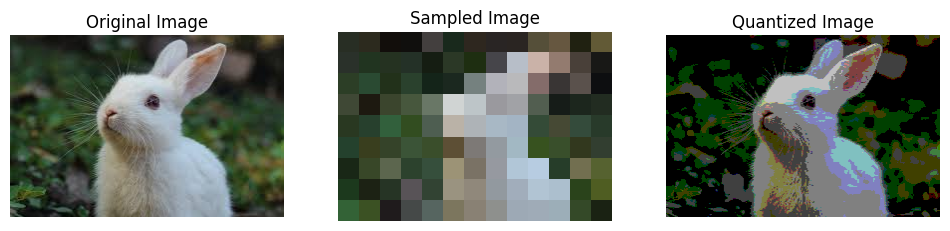

In [27]:
image_path='data/Lab1_Image_Bunny.jpg'

sampling_factor = 20
quantization_levels=4

# Load image in grayscale
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR_RGB)
if original_image is None:
  print(f"Error: Unable to load image at {image_path}")


# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)
quantized_image = quantize_image(original_image, quantization_levels)

# Plot results
plot_images(original_image, sampled_image, quantized_image)

##============Task 2============


## ***Part 1: Subtract two images and display the result***

<>:5: SyntaxWarning: invalid escape sequence '\L'
<>:5: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Admin\AppData\Local\Temp\ipykernel_9604\2729586054.py:5: SyntaxWarning: invalid escape sequence '\L'
  img1=Image.open('data\Lab1_Image_Bunny.jpg')


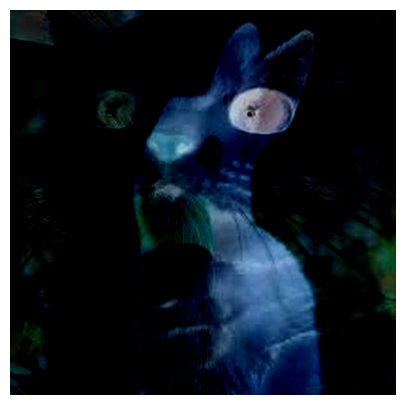

In [28]:
from PIL import Image
import matplotlib.pyplot as plt


img1=Image.open('data\Lab1_Image_Bunny.jpg')
img2=Image.open ('data/cat.jpg')

resize=(400,400)
img1=img1.resize(resize,Image.Resampling.LANCZOS)
img2=img2.resize(resize,Image.Resampling.LANCZOS)
im1arr=np.asarray(img1)
im2arr=np.asarray(img2)
subtraction=cv2.subtract(im1arr,im2arr)
resultImage=Image.fromarray(subtraction)

#matplotlib to plot the image correctly. (Had a problem with pillow not showing the image)
plt.figure(figsize=(10,5))
plt.axis('Off')
plt.imshow(resultImage)
plt.show()

## ***Part 2: Add one image with a constant value of 175 and display it.***

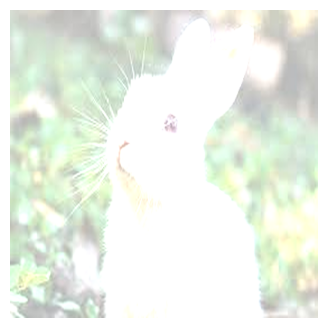

In [29]:
imageArray175 = cv2.add(im1arr, 175)
imageAdd175 = Image.fromarray(imageArray175)
plt.figure(figsize=(8,4))
plt.axis('Off')
plt.imshow(imageAdd175)
plt.show()

## ***Part 3: Apply the set difference operation on two Gray-Scale images***

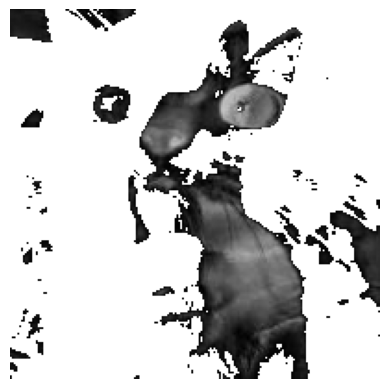

In [31]:
img1GrayscaleArray=Image.open('data/Lab1_Image_Bunny.jpg').resize((200,200)).convert('L')
img2GrayscaleArray = Image.open("data/cat.jpg").resize((200,200)).convert('L')


arr1GrayscaleArray = np.array(img1GrayscaleArray).astype(np.uint16)
arr2GrayscaleArray = np.array(img2GrayscaleArray).astype(np.uint16)

diffImage = arr1GrayscaleArray - (arr2GrayscaleArray)
diffImage = np.clip(diffImage, 0, 255)

diffImage = Image.fromarray(diffImage)
plt.imshow(diffImage, cmap = 'grey')
plt.axis('Off')
plt.show()

## ***Part 4: Apply the symmetric difference operation on two Gray-Scale images.***

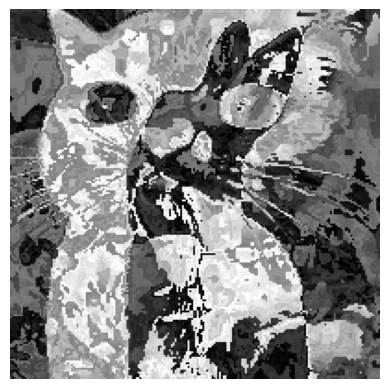

In [32]:
diffImage = arr1GrayscaleArray ^ arr2GrayscaleArray
plt.imshow(diffImage, cmap="grey")
plt.axis('Off')
plt.show()

## ***Part 5: Apply Intersection operations on two Gray-Scale images.***

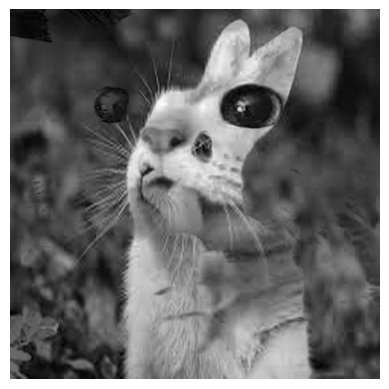

In [33]:
resize=(400,400)
img3=img1.resize(resize,Image.Resampling.LANCZOS).convert('L')
img4=img2.resize(resize,Image.Resampling.LANCZOS).convert('L')

im3arr=np.asarray(img3)
im4arr=np.asarray(img4)

intersection = np.minimum(im3arr, im4arr)

resultImage2=Image.fromarray(intersection)

plt.imshow(resultImage2, cmap='grey')
plt.axis('Off')
plt.show()